#### 1. Probing result of different layers and components of Llama3.1-8B-Instruct pn Math-Shepherd

In [1]:
#import
import sys
import os

In [2]:
# set pwd
sys.path.append('/home/yichuan/HKU/honest_llama')
os.chdir('/home/yichuan/HKU/honest_llama')
print(f'The current working directory: {os.getcwd()}')

The current working directory: /home/yichuan/HKU/honest_llama


In [3]:
# input jsonl stat file
layer_probe_path = './trained_probes/math_shepherd/llama3.1_8b_instruct_full_layers/cls/eval_stat_1000.jsonl'
# output graph path


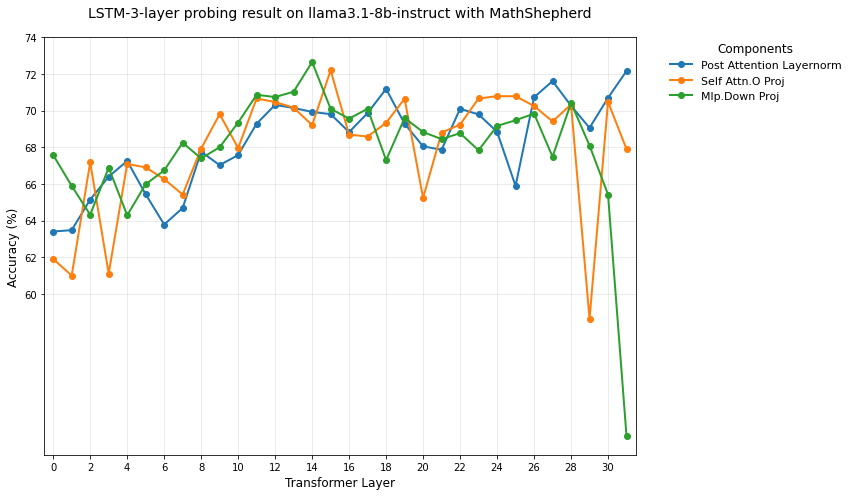

In [8]:
# %matplotlib inline
import json
import matplotlib.pyplot as plt
import numpy as np

# Initialize data storage structure
components = {
    'post_attention_layernorm': [],
    'self_attn.o_proj': [],
    'mlp.down_proj': []
}

# Read and process the JSONL file
with open(layer_probe_path, 'r') as f:  # Replace with your actual filename
    lines = f.readlines()
    for line in lines[:-1]:
        entry = json.loads(line)
        comp = entry['component']
        if comp in components:
            # Ensure we have entries for all 32 layers
            while len(components[comp]) <= entry['layer']:
                components[comp].append(None)
            components[comp][entry['layer']] = entry['Acc']

# components
            
# Pad all components to 32 layers
for comp in components:
    while len(components[comp]) < 32:
        components[comp].append(None)

# Convert to numpy arrays for handling NaN
layers = np.arange(32)
data = {comp: np.array(vals, dtype=np.float32) for comp, vals in components.items()}

# Create plot
plt.figure(figsize=(12, 7), facecolor='white')

# Plot each component
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for idx, (comp, values) in enumerate(data.items()):
    plt.plot(layers, values, 
             marker='o', 
             linestyle='-', 
             color=colors[idx], 
             linewidth=2,
             markersize=6,
             label=comp.replace('_', ' ').title())

# Configure plot appearance
plt.gca().set_facecolor('white')
plt.title("LSTM-3-layer probing result on llama3.1-8b-instruct with MathShepherd", 
          fontsize=14, pad=20)
plt.xlabel("Transformer Layer", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(np.arange(0, 32, 2), fontsize=10)
plt.yticks(np.arange(60, 75, 2), fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(-0.5, 31.5)

# Create legend with enhanced visibility
legend = plt.legend(bbox_to_anchor=(1.05, 1), 
                    loc='upper left',
                    borderaxespad=0.,
                    frameon=False,
                    title="Components",
                    title_fontsize=12,
                    fontsize=11)

# Save and display
plt.tight_layout()
plt.savefig('./figs/probing_results.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()